In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [2]:
names = pd.read_csv('/Users/code/code/TheChwal/Freelance/movie-recommendation/datasets/name.basics.tsv', sep='\t', usecols=['nconst', 'primaryName'])

In [3]:
names

,nconst,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman
...,...,...
12589572,nm9993714,Romeo del Rosario
12589573,nm9993716,Essias Loberg
12589574,nm9993717,Harikrishnan Rajan
12589575,nm9993718,Aayush Nair


In [4]:
principals = pd.read_csv('/Users/code/code/TheChwal/Freelance/movie-recommendation/datasets/title.principals.tsv', sep='\t', usecols=['tconst', 'nconst', 'category'])


In [5]:
movies = pd.read_csv('/Users/code/code/TheChwal/Freelance/movie-recommendation/datasets/title.basics.tsv', sep='\t', usecols=['tconst', 'primaryTitle', 'genres','titleType'])


In [6]:
movies

,tconst,titleType,primaryTitle,genres
0,tt0000001,short,Carmencita,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,"Comedy,Short"
...,...,...,...,...
9909075,tt9916848,tvEpisode,Episode #3.17,"Action,Drama,Family"
9909076,tt9916850,tvEpisode,Episode #3.19,"Action,Drama,Family"
9909077,tt9916852,tvEpisode,Episode #3.20,"Action,Drama,Family"
9909078,tt9916856,short,The Wind,Short


In [7]:
movies = movies[movies['titleType']=='movie']

In [8]:
movies

,tconst,titleType,primaryTitle,genres
8,tt0000009,movie,Miss Jerry,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,\N
570,tt0000574,movie,The Story of the Kelly Gang,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,Drama
...,...,...,...,...
9908971,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
9908998,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,Documentary
9909010,tt9916706,movie,Dankyavar Danka,Comedy
9909020,tt9916730,movie,6 Gunn,\N


In [9]:
movies.drop(columns="titleType", inplace=True)

/var/folders/kz/hz2ck7t57ls0d7jvrtc6l6qh0000gq/T/ipykernel_91329/4290554100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.drop(columns="titleType", inplace=True)


In [10]:
movies

,tconst,primaryTitle,genres
8,tt0000009,Miss Jerry,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,"Documentary,News,Sport"
498,tt0000502,Bohemios,\N
570,tt0000574,The Story of the Kelly Gang,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,Drama
...,...,...,...
9908971,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
9908998,tt9916680,De la ilusión al desconcierto: cine colombiano...,Documentary
9909010,tt9916706,Dankyavar Danka,Comedy
9909020,tt9916730,6 Gunn,\N


In [11]:
merged_df = pd.merge(pd.merge(names, principals), movies, on="tconst")

In [12]:
merged_df

,nconst,primaryName,tconst,category,primaryTitle,genres
0,nm0000001,Fred Astaire,tt0025164,actor,The Gay Divorcee,"Comedy,Musical,Romance"
1,nm0001677,Ginger Rogers,tt0025164,actress,The Gay Divorcee,"Comedy,Musical,Romance"
2,nm0002143,Edward Everett Horton,tt0025164,actor,The Gay Divorcee,"Comedy,Musical,Romance"
3,nm0103567,Alice Brady,tt0025164,actress,The Gay Divorcee,"Comedy,Musical,Romance"
4,nm0388755,Samuel Hoffenstein,tt0025164,writer,The Gay Divorcee,"Comedy,Musical,Romance"
...,...,...,...,...,...,...
4565764,nm9992852,Dahl Lee,tt8757056,director,Tobot Movie: Attack of Robot Force,"Action,Adventure,Animation"
4565765,nm9992853,Dongwoo Ko,tt8757056,director,Tobot Movie: Attack of Robot Force,"Action,Adventure,Animation"
4565766,nm9992899,Ariane Figueiredo,tt8742566,writer,White Spot,"Adventure,Documentary,Drama"
4565767,nm9992900,Tin Brendel,tt8742566,director,White Spot,"Adventure,Documentary,Drama"


In [13]:
aggregated_df = merged_df.groupby('tconst').agg({
    'primaryTitle': 'first',
    'genres': lambda x: ', '.join(x.dropna()) if x.notna().any() else 'Unknown',
    'nconst': lambda x: ', '.join(x),
    'category': lambda x: ', '.join(x),
     'primaryName': lambda x: ', '.join(x)
}).reset_index()


In [14]:
aggregated_df

,tconst,primaryTitle,genres,nconst,category,primaryName
0,tt0000009,Miss Jerry,"Romance, Romance, Romance, Romance","nm0063086, nm0085156, nm0183823, nm1309758","actress, director, actor, actor","Blanche Bayliss, Alexander Black, William Cour..."
1,tt0000147,The Corbett-Fitzsimmons Fight,"Documentary,News,Sport, Documentary,News,Sport...","nm0103755, nm0179163, nm0280615, nm0714557, nm...","producer, self, self, director, self, self, self","William A. Brady, James J. Corbett, Bob Fitzsi..."
2,tt0000502,Bohemios,"\N, \N, \N, \N, \N","nm0063413, nm0215752, nm0252720, nm0657268, nm...","director, actor, actor, writer, writer","Ricardo de Baños, Antonio del Pozo, El Mochuel..."
3,tt0000574,The Story of the Kelly Gang,"Action,Adventure,Biography, Action,Adventure,B...","nm0317210, nm0425854, nm0675239, nm0846879, nm...","producer, producer, cinematographer, director,...","W.A. Gibson, Millard Johnson, Orrie Perry, Cha..."
4,tt0000591,The Prodigal Son,"Drama, Drama, Drama, Drama, Drama","nm0141150, nm0332182, nm0906197, nm1323543, nm...","director, actor, actor, actress, actress","Michel Carré, Henri Gouget, Georges Wague, Chr..."
...,...,...,...,...,...,...
630828,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,"Documentary, Documentary, Documentary, Documen...","nm10538556, nm10538557, nm10538558, nm8349149,...","self, self, self, cinematographer, cinematogra...","Cecília Cunha, José Augusto Bezerra, Renato Ca..."
630829,tt9916680,De la ilusión al desconcierto: cine colombiano...,"Documentary, Documentary, Documentary, Documen...","nm0033355, nm0127882, nm0133349, nm0652213, nm...","self, self, self, director, self, writer, cine...","Ramiro Arbeláez, Sergio Cabrera, Óscar Campo, ..."
630830,tt9916706,Dankyavar Danka,"Comedy, Comedy, Comedy, Comedy, Comedy, Comedy...","nm10538597, nm1778107, nm2585097, nm2983963, n...","cinematographer, actor, actor, producer, actre...","Sandhya Nerale, Makarand Anaspure, Anvay Bendr..."
630831,tt9916730,6 Gunn,"\N, \N, \N, \N, \N, \N, \N, \N, \N","nm0059461, nm10538612, nm10538613, nm10538614,...","actor, director, producer, producer, actor, ci...","Sunil Barve, Kiran Gawade, Abhishek Jathar, Uj..."


In [15]:
aggregated_df['features'] = aggregated_df['primaryTitle'] + ' ' + \
                             aggregated_df['genres'] + ' ' + \
                             aggregated_df['nconst'] + ' ' + \
                            aggregated_df['category'] + ' ' + \
                             aggregated_df['primaryName']

In [16]:
aggregated_df

,tconst,primaryTitle,genres,nconst,category,primaryName,features
0,tt0000009,Miss Jerry,"Romance, Romance, Romance, Romance","nm0063086, nm0085156, nm0183823, nm1309758","actress, director, actor, actor","Blanche Bayliss, Alexander Black, William Cour...","Miss Jerry Romance, Romance, Romance, Romance ..."
1,tt0000147,The Corbett-Fitzsimmons Fight,"Documentary,News,Sport, Documentary,News,Sport...","nm0103755, nm0179163, nm0280615, nm0714557, nm...","producer, self, self, director, self, self, self","William A. Brady, James J. Corbett, Bob Fitzsi...","The Corbett-Fitzsimmons Fight Documentary,News..."
2,tt0000502,Bohemios,"\N, \N, \N, \N, \N","nm0063413, nm0215752, nm0252720, nm0657268, nm...","director, actor, actor, writer, writer","Ricardo de Baños, Antonio del Pozo, El Mochuel...","Bohemios \N, \N, \N, \N, \N nm0063413, nm02157..."
3,tt0000574,The Story of the Kelly Gang,"Action,Adventure,Biography, Action,Adventure,B...","nm0317210, nm0425854, nm0675239, nm0846879, nm...","producer, producer, cinematographer, director,...","W.A. Gibson, Millard Johnson, Orrie Perry, Cha...","The Story of the Kelly Gang Action,Adventure,B..."
4,tt0000591,The Prodigal Son,"Drama, Drama, Drama, Drama, Drama","nm0141150, nm0332182, nm0906197, nm1323543, nm...","director, actor, actor, actress, actress","Michel Carré, Henri Gouget, Georges Wague, Chr...","The Prodigal Son Drama, Drama, Drama, Drama, D..."
...,...,...,...,...,...,...,...
630828,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,"Documentary, Documentary, Documentary, Documen...","nm10538556, nm10538557, nm10538558, nm8349149,...","self, self, self, cinematographer, cinematogra...","Cecília Cunha, José Augusto Bezerra, Renato Ca...",Rodolpho Teóphilo - O Legado de um Pioneiro Do...
630829,tt9916680,De la ilusión al desconcierto: cine colombiano...,"Documentary, Documentary, Documentary, Documen...","nm0033355, nm0127882, nm0133349, nm0652213, nm...","self, self, self, director, self, writer, cine...","Ramiro Arbeláez, Sergio Cabrera, Óscar Campo, ...",De la ilusión al desconcierto: cine colombiano...
630830,tt9916706,Dankyavar Danka,"Comedy, Comedy, Comedy, Comedy, Comedy, Comedy...","nm10538597, nm1778107, nm2585097, nm2983963, n...","cinematographer, actor, actor, producer, actre...","Sandhya Nerale, Makarand Anaspure, Anvay Bendr...","Dankyavar Danka Comedy, Comedy, Comedy, Comedy..."
630831,tt9916730,6 Gunn,"\N, \N, \N, \N, \N, \N, \N, \N, \N","nm0059461, nm10538612, nm10538613, nm10538614,...","actor, director, producer, producer, actor, ci...","Sunil Barve, Kiran Gawade, Abhishek Jathar, Uj...","6 Gunn \N, \N, \N, \N, \N, \N, \N, \N, \N nm00..."


In [34]:
aggregated_df=aggregated_df.replace(r'\s*\\N\s*', '', regex=True)

In [35]:
aggregated_df

,tconst,primaryTitle,genres,nconst,category,primaryName,features
0,tt0000009,Miss Jerry,"Romance, Romance, Romance, Romance","nm0063086, nm0085156, nm0183823, nm1309758","actress, director, actor, actor","Blanche Bayliss, Alexander Black, William Cour...","Miss Jerry Romance, Romance, Romance, Romance ..."
1,tt0000147,The Corbett-Fitzsimmons Fight,"Documentary,News,Sport, Documentary,News,Sport...","nm0103755, nm0179163, nm0280615, nm0714557, nm...","producer, self, self, director, self, self, self","William A. Brady, James J. Corbett, Bob Fitzsi...","The Corbett-Fitzsimmons Fight Documentary,News..."
2,tt0000502,Bohemios,,"nm0063413, nm0215752, nm0252720, nm0657268, nm...","director, actor, actor, writer, writer","Ricardo de Baños, Antonio del Pozo, El Mochuel...","Bohemios,nm0063413, nm0215752, nm0252720, nm06..."
3,tt0000574,The Story of the Kelly Gang,"Action,Adventure,Biography, Action,Adventure,B...","nm0317210, nm0425854, nm0675239, nm0846879, nm...","producer, producer, cinematographer, director,...","W.A. Gibson, Millard Johnson, Orrie Perry, Cha...","The Story of the Kelly Gang Action,Adventure,B..."
4,tt0000591,The Prodigal Son,"Drama, Drama, Drama, Drama, Drama","nm0141150, nm0332182, nm0906197, nm1323543, nm...","director, actor, actor, actress, actress","Michel Carré, Henri Gouget, Georges Wague, Chr...","The Prodigal Son Drama, Drama, Drama, Drama, D..."
...,...,...,...,...,...,...,...
630828,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,"Documentary, Documentary, Documentary, Documen...","nm10538556, nm10538557, nm10538558, nm8349149,...","self, self, self, cinematographer, cinematogra...","Cecília Cunha, José Augusto Bezerra, Renato Ca...",Rodolpho Teóphilo - O Legado de um Pioneiro Do...
630829,tt9916680,De la ilusión al desconcierto: cine colombiano...,"Documentary, Documentary, Documentary, Documen...","nm0033355, nm0127882, nm0133349, nm0652213, nm...","self, self, self, director, self, writer, cine...","Ramiro Arbeláez, Sergio Cabrera, Óscar Campo, ...",De la ilusión al desconcierto: cine colombiano...
630830,tt9916706,Dankyavar Danka,"Comedy, Comedy, Comedy, Comedy, Comedy, Comedy...","nm10538597, nm1778107, nm2585097, nm2983963, n...","cinematographer, actor, actor, producer, actre...","Sandhya Nerale, Makarand Anaspure, Anvay Bendr...","Dankyavar Danka Comedy, Comedy, Comedy, Comedy..."
630831,tt9916730,6 Gunn,,"nm0059461, nm10538612, nm10538613, nm10538614,...","actor, director, producer, producer, actor, ci...","Sunil Barve, Kiran Gawade, Abhishek Jathar, Uj...","6 Gunn,nm0059461, nm10538612, nm10538613, nm10..."


In [36]:
aggregated_df.shape

(630833, 7)

In [39]:
vectorizer = CountVectorizer()


In [40]:
feature_matrix = vectorizer.fit_transform(aggregated_df['features'].astype(str))

In [41]:
feature_df = pd.DataFrame.sparse.from_spmatrix(feature_matrix, index=aggregated_df.index.tolist())

In [42]:
feature_df

,0,1,2,3,4,5,6,7,8,9,...,2243631,2243632,2243633,2243634,2243635,2243636,2243637,2243638,2243639,2243640
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
svd = TruncatedSVD(n_components=35)

In [50]:
latent_df = svd.fit_transform(feature_df)

In [51]:
latent_df.shape

(630833, 35)

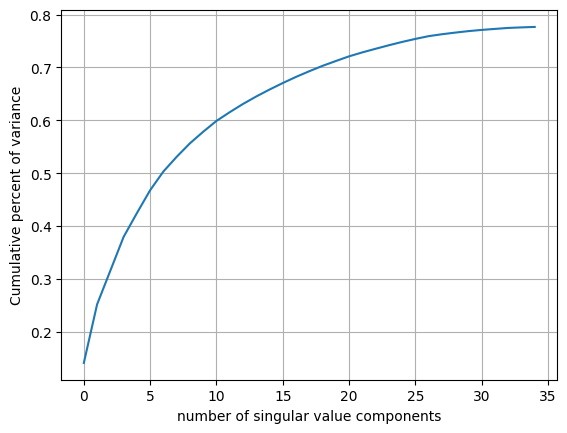

In [52]:
# Plot variance as a function of the number of components.
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [54]:
latent_df = pd.DataFrame(latent_df[:,0:35], index=aggregated_df.primaryTitle.tolist())

In [55]:
latent_df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Miss Jerry,1.609982,0.899340,-0.005173,-0.177205,3.922830,0.106830,-0.080461,0.729734,0.227074,-1.347890,...,0.139794,-0.148070,-0.115432,0.644236,0.026560,0.038464,-0.077964,0.016656,-0.053989,-0.090136
The Corbett-Fitzsimmons Fight,0.660297,0.625735,7.894402,-2.525155,-0.017315,-0.354181,0.411441,-0.500497,-0.369268,0.659248,...,6.558671,2.739556,0.046076,0.399259,-0.049123,0.091220,0.521327,-0.376355,-0.197747,-0.296449
Bohemios,1.073326,0.508473,0.450899,0.589608,0.151825,0.246887,-0.467594,0.634619,0.405378,-1.299046,...,-0.118875,-0.142151,-0.487029,0.416724,0.042045,-0.130837,-0.258838,0.383944,1.843925,0.543586
The Story of the Kelly Gang,3.754639,2.208399,3.937604,8.594955,1.080095,-7.210330,-4.720295,0.222571,4.071117,3.140319,...,0.121162,-0.597332,-0.767271,-0.055389,-0.094402,0.324897,1.408986,-1.322254,0.129941,-0.200080
The Prodigal Son,5.271088,-1.681039,-0.213546,-0.382416,-0.573538,0.181782,-0.610868,0.284095,-0.001320,-0.917405,...,0.229848,-0.243538,0.201489,0.674116,0.029206,0.060772,0.698165,-0.423925,0.103752,-0.002918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rodolpho Teóphilo - O Legado de um Pioneiro,1.341778,0.995000,10.234202,-2.937459,0.050022,-0.239051,0.253450,-0.196266,-0.276256,-0.309308,...,-0.768038,0.590123,-1.212418,-0.298113,-1.922243,-0.208330,-1.501567,-1.246762,1.737583,0.604368
De la ilusión al desconcierto: cine colombiano 1970-1995,0.978798,0.863383,10.245595,-3.228698,0.016303,-0.406108,0.526010,-0.509758,-0.380121,0.603564,...,-0.260962,-0.043658,-0.990778,-0.989798,-1.648248,-0.186922,-0.733744,-0.035046,1.095049,0.353237
Dankyavar Danka,4.539250,9.369736,-1.037282,-1.187706,-2.078460,0.434470,-0.049526,-0.341794,-0.139184,-0.997939,...,0.064262,-0.025918,-0.526022,-0.401329,-1.110095,-0.061324,-0.553978,-0.594002,-0.123091,-0.031869
6 Gunn,1.781504,0.786274,0.905507,0.975139,0.210111,0.549141,-0.843251,0.996326,0.496506,-2.579903,...,0.292221,-0.328995,-1.065291,-0.223859,-0.761213,-0.003092,0.086624,0.636093,-0.082857,-0.109544
